In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('NewResults')

In [3]:
for exl in os.listdir('.'):
    if exl.endswith('.xlsx'):
        df = pd.read_excel(exl)
        
        cur_max = np.zeros(len(df['NAV']), dtype=np.float64)
        drawdown = np.zeros(len(df['NAV']), dtype=np.float64)
        for i, val in enumerate(df['NAV']):
            if i == 0:
                cur_max[i] = val
            else:
                cur_max[i] = max(val, cur_max[i-1])
            drawdown[i] = (val - cur_max[i]) / cur_max[i]
        print(exl + ":", np.max(drawdown*-100))
        
            

Lookback_21_Holding_21.xlsx: 67.14585469932177
Lookback_21_Holding_7.xlsx: 75.45141502225083
Lookback_126_Holding_7.xlsx: 44.65971526946865
Lookback_63_Holding_7.xlsx: 50.42057540379569
Lookback_252_Holding_7.xlsx: 39.58660400236358
Lookback_126_Holding_21.xlsx: 39.54275275495828
Lookback_252_Holding_21.xlsx: 35.83064559153512
Lookback_63_Holding_21.xlsx: 46.41732286829623
Lookback_7_Holding_7.xlsx: 51.459150993562986



 Lookback_21_Holding_21.xlsx


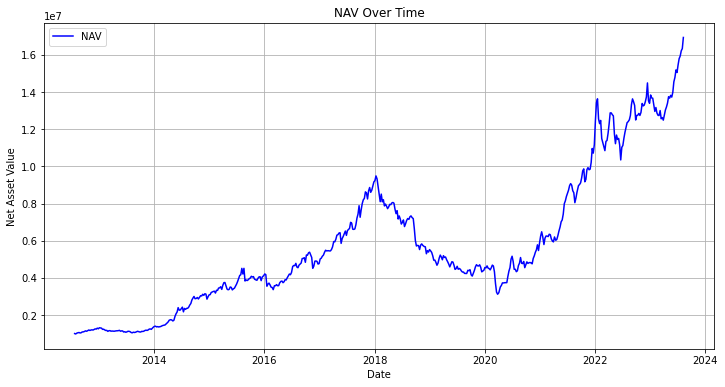

Sharpe Ratio: 2.4858486701054865
Sortino Ratio: 3.23506604361929

 Lookback_21_Holding_7.xlsx


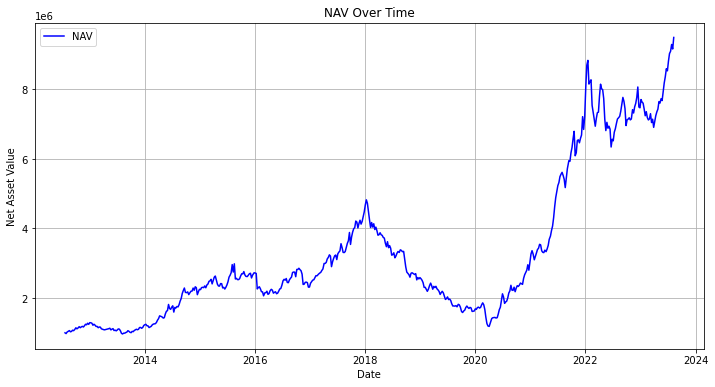

Sharpe Ratio: 1.9832338053941228
Sortino Ratio: 2.6834513415103705

 Lookback_126_Holding_7.xlsx


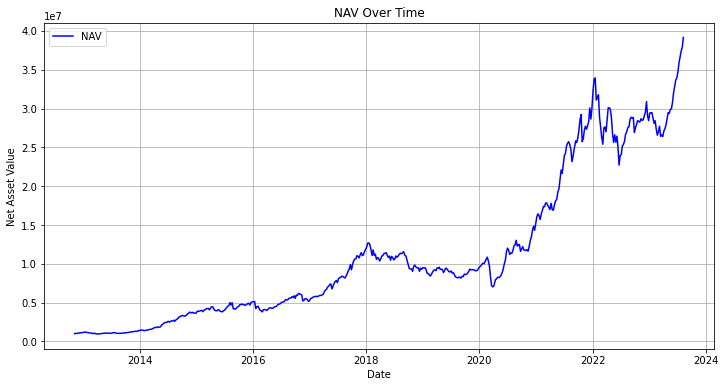

Sharpe Ratio: 3.215028014094842
Sortino Ratio: 3.9637898937792952

 Lookback_63_Holding_7.xlsx


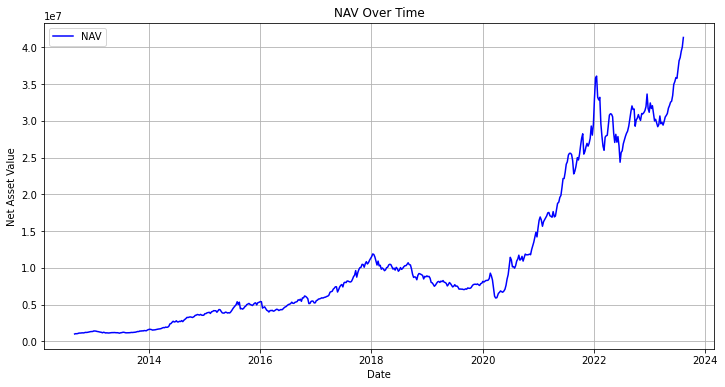

Sharpe Ratio: 3.1097297772293664
Sortino Ratio: 4.053271881238627

 Lookback_252_Holding_7.xlsx


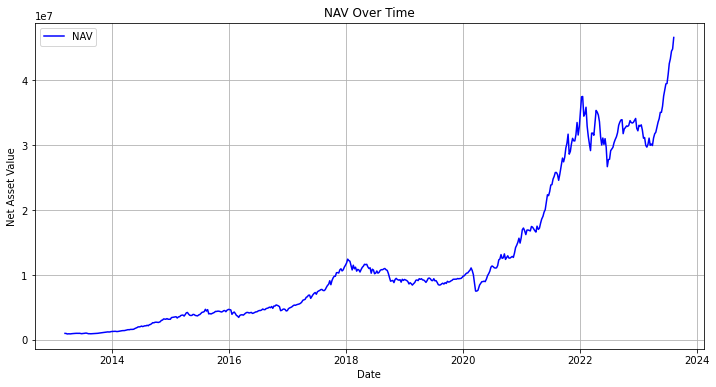

Sharpe Ratio: 3.568852808872647
Sortino Ratio: 4.4010539325782885

 Lookback_126_Holding_21.xlsx


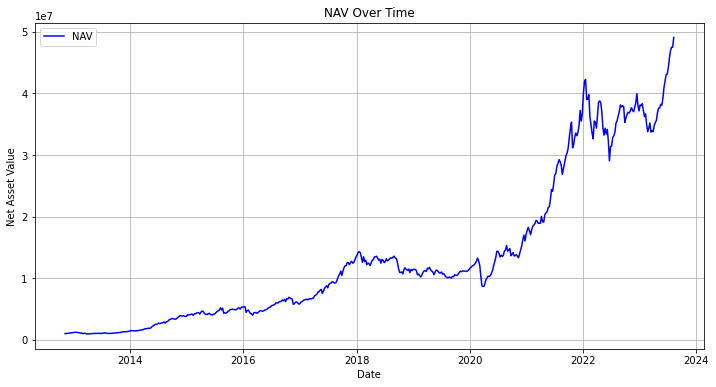

Sharpe Ratio: 3.36465019641158
Sortino Ratio: 4.132888643461243

 Lookback_252_Holding_21.xlsx


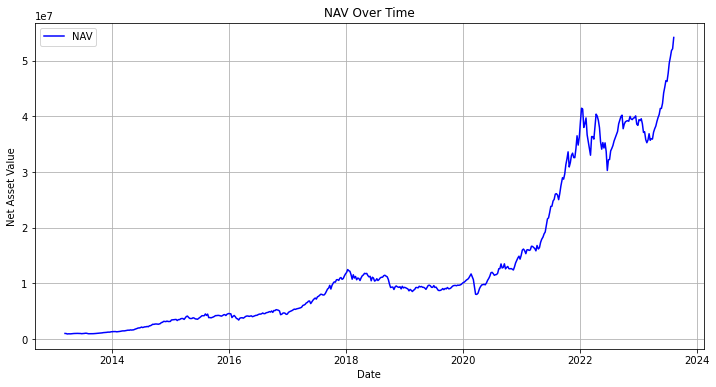

Sharpe Ratio: 3.6777104876513502
Sortino Ratio: 4.563823569704528

 Lookback_63_Holding_21.xlsx


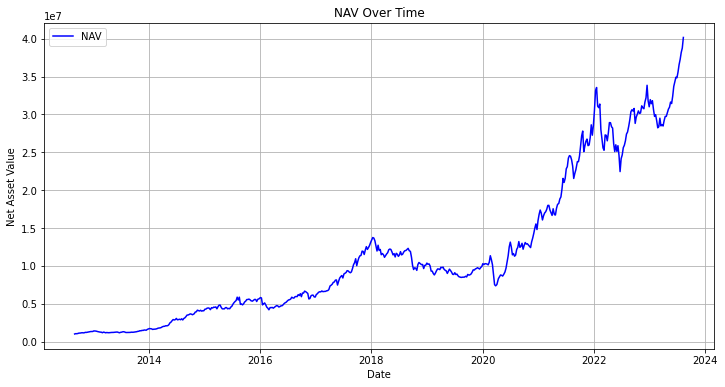

Sharpe Ratio: 3.1129678884751137
Sortino Ratio: 4.043919042159361

 Lookback_7_Holding_7.xlsx


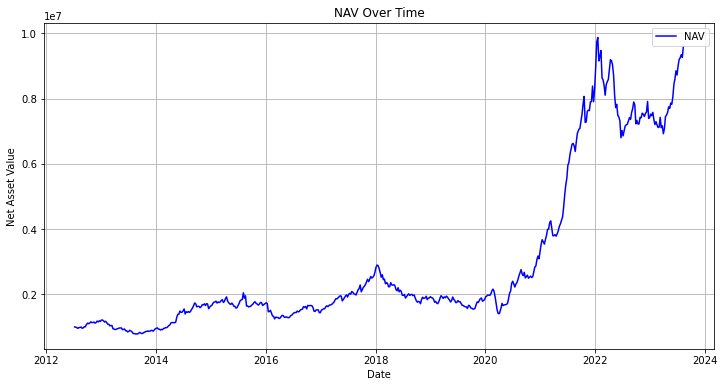

Sharpe Ratio: 2.0448235755563915
Sortino Ratio: 2.7811664108412772


In [4]:
for exl in os.listdir('.'):
    if exl.endswith('.xlsx'):
        print("\n", exl)
        # Read the Excel file
        # Assuming the file has a 'Date' column and a 'NAV' column
        nav_data = pd.read_excel(exl, index_col='Date', parse_dates=True)

        # Convert index and NAV values to numpy arrays
        dates = nav_data.index.to_numpy()
        nav_values = nav_data['NAV'].to_numpy()

        # Plot NAV over time
        plt.figure(figsize=(12, 6))
        plt.plot(dates, nav_values, label='NAV', color='blue')
        plt.title('NAV Over Time')
        plt.xlabel('Date')
        plt.ylabel('Net Asset Value')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calculate Sharpe Ratio
        # Assuming a risk-free rate of 0%
        daily_returns = nav_data['NAV'].pct_change().dropna()
        sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)  # Annualized

        # Calculate Sortino Ratio
        # Assuming a risk-free rate of 0% and focusing only on the downside
        negative_returns = daily_returns[daily_returns < 0]
        sortino_ratio = daily_returns.mean() / negative_returns.std() * np.sqrt(252)  # Annualized

        print(f"Sharpe Ratio: {sharpe_ratio}")
        print(f"Sortino Ratio: {sortino_ratio}")
